In [1]:
import ROOT
import numpy as np

Welcome to JupyROOT 6.18/04


In [2]:
import math

In [3]:
def f(xx, pp):
    x, y = xx[0], xx[1]
    p = pp[0]
    return 1/((x**2) * (y + np.sin(x)/2))*p


xa = 0.01
xb = 1
ya = 0
yb = 1

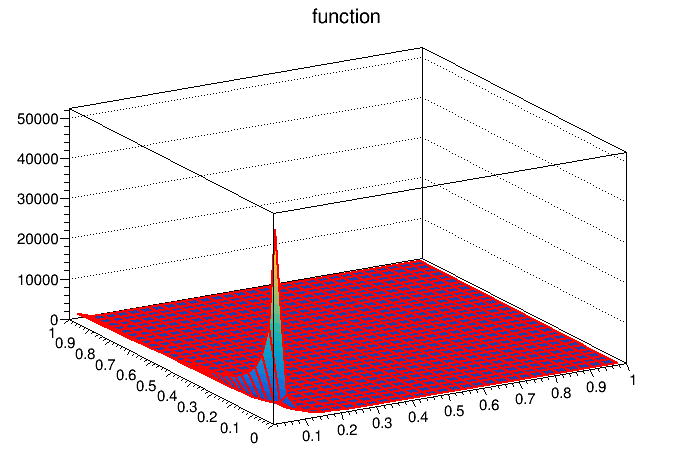

In [4]:
canvas = ROOT.TCanvas()
function = ROOT.TF2("function", f, xa, xb, ya, yb, 1)
function.SetParameter(0,1)
function.Draw("surf1")
canvas.Draw()

In [5]:
def integrate(function,pp, a, b, N):
    ax, ay = a[0], a[1]
    bx, by = b[0], b[1]
    result = 0 
    for j in range(0, N):
        xj = ROOT.gRandom.Uniform(ax, bx)
        yj = ROOT.gRandom.Uniform(ay, by)
        fj = function((xj, yj), pp)
        result += fj*(bx-ax)*(by-ay)
    return result/N

In [77]:
def deviation(squared_sum, sum_, N):
    return ROOT.TMath.Sqrt(squared_sum/N - 2*(sum_/N)*(sum_/N/N) + sum_**2/N**3)

In [246]:
def average_method_stat(function, pp, a, b, steps_number, step_range):
    
    results = ([], [])
    errors = ([], [])
    
    
    ax, ay = a[0], a[1]
    bx, by = b[0], b[1]
    
    squares_sum = 0 
    single_squares_sum = 0
    
    sum_ = 0
    single_sum_ = 0
    for event_number in range(1, steps_number*step_range+1):
        if event_number % step_range == 0:
            results[0].append(single_sum_/step_range)
            results[1].append(sum_/event_number)
  
            errors[0].append(((bx-ax)*(by-ay)/ROOT.TMath.Sqrt(step_range))*deviation(single_squares_sum,single_sum_,step_range))
            errors[1].append(((bx-ax)*(by-ay)/ROOT.TMath.Sqrt(event_number)) *deviation(squares_sum,sum_,event_number))
            
            single_sum_ = 0
            single_squares_sum = 0
            
        xj = ROOT.gRandom.Uniform(ax, bx)
        yj = ROOT.gRandom.Uniform(ay, by)
        fj = function((xj, yj), pp)
        current_integral = fj*(bx-ax)*(by-ay)
        sum_ += current_integral
        single_sum_ += current_integral
        
        squares_sum += current_integral**2
        single_squares_sum += current_integral**2
        
    return (results, errors)

In [247]:
steps_number = 10
step_range = 1000

In [260]:
results = average_method_stat(f, (1,), (xa, ya), (xb, yb), steps_number, step_range)

In [270]:
def print_stat(results):
    print("+-------+-----------+-------+-----------+")
    print(f"|   N   |   error   |   N   |   error   |")
    print("+-------+-----------+-------+-----------+")
    for i in range(steps_number):

        print(f"|{step_range:^7}|{results[1][0][i]:^11.6g}|{step_range*(i+1):^7}|{results[1][1][i]:^11.6g}|")
    print("+-------+-----------+-------+-----------+")
    

In [271]:
print_stat(results)

+-------+-----------+-------+-----------+
|   N   |   error   |   N   |   error   |
+-------+-----------+-------+-----------+
| 1000  |  95.5282  | 1000  |  95.5282  |
| 1000  |  50.6749  | 2000  |  54.0686  |
| 1000  |  72.5556  | 3000  |  43.4077  |
| 1000  |  68.4277  | 4000  |  36.7768  |
| 1000  |  417.705  | 5000  |  88.5706  |
| 1000  |  100.442  | 6000  |  75.6835  |
| 1000  |  96.0619  | 7000  |  66.3072  |
| 1000  |  61.2328  | 8000  |  58.5215  |
| 1000  |  100.93   | 9000  |  53.2142  |
| 1000  |  115.484  | 10000 |  49.2655  |
+-------+-----------+-------+-----------+


In [290]:
print((np.array(results[0][1])).mean())

365.94107463787657


In [266]:
X_C = 0.01

def g1(xx, pp):
    x = xx[0]
    y = xx[1]
    return 1/(y + X_C/2)/(x**2)
    
def g2(xx, pp):
    x = xx[0]
    y = xx[1]
    return 1/(x**2*(y + ROOT.TMath.Sin(x)/2)) - g1((x, y), pp)

In [267]:
def g1_x(x):
    return -1/x

def g1_y(y):
    return math.log(y+x_const/2)

g1_result = (g1_x(xb) - g1_x(xa))*(g1_y(yb) - g1_y(ya))
print(g1_result)

525.0271858978484


In [287]:
results_main_part = average_method_stat(g2, (1,), (xa, ya), (xb, yb), steps_number, step_range)

In [288]:
print_stat(results_main_part)

+-------+-----------+-------+-----------+
|   N   |   error   |   N   |   error   |
+-------+-----------+-------+-----------+
| 1000  |  12.8867  | 1000  |  12.8867  |
| 1000  |  32.739   | 2000  |  17.592   |
| 1000  |  12.2269  | 3000  |  12.416   |
| 1000  |  4.56648  | 4000  |  9.38173  |
| 1000  |  16.2575  | 5000  |  8.17944  |
| 1000  |  212.392  | 6000  |  36.0489  |
| 1000  |  44.8691  | 7000  |  31.5569  |
| 1000  |  86.9705  | 8000  |  29.6753  |
| 1000  |  26.1371  | 9000  |  26.5375  |
| 1000  |  10.2915  | 10000 |  23.9059  |
+-------+-----------+-------+-----------+


In [289]:
print((np.array(results_main_part[0][1]) + g1_result).mean())

443.8234962154641
